# Классификация знаков дорожного движения

## Импорты

In [1]:
!git clone https://github.com/TheNeuron-EM/signs_classification_aij2021

Cloning into 'signs_classification_aij2021'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 92 (delta 29), reused 10 (delta 10), pack-reused 56
Unpacking objects: 100% (92/92), done.


In [1]:
!pip install efficientnet_pytorch
!pip install albumentations
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Чтобы не перезапускать ноутбук, если меняются .py файлы

In [1]:
%load_ext autoreload
%autoreload 2

Чтобы импортировать функции из нашего модуля

In [2]:
%cd signs_classification_aij2021/

/home/jovyan/signs_classification_aij2021


In [3]:
import sys
sys.path.append('../')

Нужные импорты

In [4]:
from os import path as osp
from typing import Tuple

import cv2
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from pipeline.constants import DEFAULT_DATA_PATH, DEFAULT_EXPERIMENTS_SAVE_PATH
from pipeline.dataset import read_rgb_img
from pipeline.generate_submission import get_and_save_test_result, get_inference_model, get_pseudo, get_and_save_test_resultt
from pipeline.train import train
from pipeline.models import SignsClassifier

Loaded pretrained weights for efficientnet-b2
Loaded pretrained weights for efficientnet-b7


## Функции для визуализации

In [5]:
def plot_image_from_row(row: pd.Series, figsize: Tuple[int, int] = (10, 10)) -> None:
    img_path = osp.join(DEFAULT_DATA_PATH, row.filename)
    img = read_rgb_img(img_path)
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img)


def plot_image_with_label_from_row(row: pd.Series, figsize: Tuple[int, int] = (10, 10)) -> None:
    print(f'Label: {row["label"]}')
    plot_image_from_row(row, figsize)

## Посмотрим на тренировочные данные

In [32]:
df = pd.read_csv('./train.csv')
df1 = pd.read_csv('../experiments/finalefficientnetb2/submit12.csv')
df = df.append(df1)
df.to_csv('./data/train.csv', index=False)

/home/user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


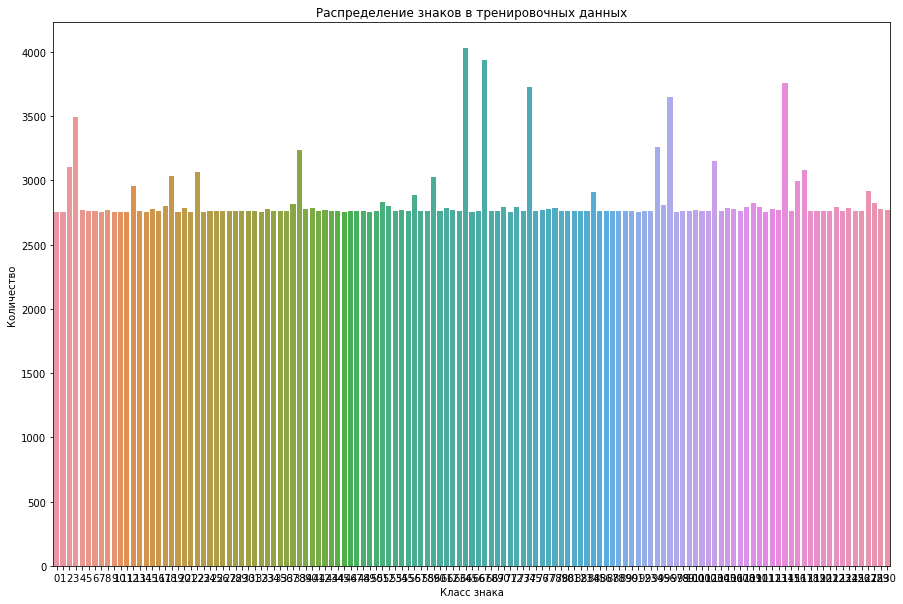

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Распределение знаков в тренировочных данных')
sns.countplot(df.label, ax=ax)
ax.set_xlabel('Класс знака')
ax.set_ylabel('Количество');

In [8]:
df.head()

,filename,label
0,parsed-train/0/res0.png,0
1,parsed-train/0/res1.png,0
2,parsed-train/0/res10.png,0
3,parsed-train/0/res100.png,0
4,parsed-train/0/res1000.png,0


Визуализация знаков из тренировочного датасета

In [5]:
exp_name = 'finalefficientnetb21'
model_name = 'efficientnet'
n_epochs = 40
batch_size = 64
device = 'cuda:0'

In [6]:
train_metrics, valid_metrics = train(
   exp_name,
    model_name,
    n_epochs,
    batch_size,
    device,
    'finalefficientnetb21'
    
  
)


Epoch 0: train_acc=0.9681; train_loss=0.134055



Epoch 0: val_acc=0.9882; val_loss=0.044113
Model saved!



Epoch 1: train_acc=0.9904; train_loss=0.035776



Epoch 1: val_acc=0.9955; val_loss=0.018232
Model saved!



Epoch 2: train_acc=0.9934; train_loss=0.024538



Epoch 2: val_acc=0.9959; val_loss=0.019203
Model saved!



Epoch 3: train_acc=0.9945; train_loss=0.019762



Epoch 3: val_acc=0.9977; val_loss=0.008342
Model saved!



Epoch 4: train_acc=0.9954; train_loss=0.016198



Epoch 4: val_acc=0.9978; val_loss=0.008750
Model saved!



Epoch 5: train_acc=0.9964; train_loss=0.013411



Epoch 5: val_acc=0.9963; val_loss=0.013268



Epoch 6: train_acc=0.9964; train_loss=0.012376



Epoch 6: val_acc=0.9985; val_loss=0.006081
Model saved!



Epoch 7: train_acc=0.9970; train_loss=0.010911



Epoch 7: val_acc=0.9981; val_loss=0.007261



Epoch 8: train_acc=0.9973; train_loss=0.009731



Epoch 8: val_acc=0.9989; val_loss=0.004794
Model saved!



Epoch 9: train_acc=0.9975; train_loss=0.008994



Epoch 9: val_acc=0.9990; val_loss=0.004252
Model saved!



Epoch 10: train_acc=0.9977; train_loss=0.008527



Epoch 10: val_acc=0.9990; val_loss=0.004060
Model saved!



Epoch 11: train_acc=0.9978; train_loss=0.007982



Epoch 11: val_acc=0.9994; val_loss=0.003170
Model saved!



Epoch 12: train_acc=0.9979; train_loss=0.007134



Epoch 12: val_acc=0.9996; val_loss=0.002193
Model saved!



Epoch 13: train_acc=0.9979; train_loss=0.007365



Epoch 13: val_acc=0.9994; val_loss=0.002640



Epoch 14: train_acc=0.9981; train_loss=0.006983



Epoch 14: val_acc=0.9995; val_loss=0.003294



Epoch 15: train_acc=0.9982; train_loss=0.006182



Epoch 15: val_acc=0.9992; val_loss=0.003442



Epoch 16: train_acc=0.9982; train_loss=0.006081



Epoch 16: val_acc=0.9992; val_loss=0.003520



Epoch 17: train_acc=0.9984; train_loss=0.006042



Epoch 17: val_acc=0.9997; val_loss=0.002634
Model saved!



Epoch 18: train_acc=0.9984; train_loss=0.005563



Epoch 18: val_acc=0.9995; val_loss=0.002409



Epoch 19: train_acc=0.9986; train_loss=0.005120



Epoch 19: val_acc=0.9997; val_loss=0.002147



Epoch 20: train_acc=0.9987; train_loss=0.004807



Epoch 20: val_acc=0.9996; val_loss=0.002102



Epoch 21: train_acc=0.9986; train_loss=0.005212



Epoch 21: val_acc=0.9993; val_loss=0.002836



Epoch 22: train_acc=0.9987; train_loss=0.004863



Epoch 22: val_acc=0.9993; val_loss=0.004163



Epoch 23: train_acc=0.9987; train_loss=0.004479



Epoch 23: val_acc=0.9995; val_loss=0.002632


KeyboardInterrupt: 

## Протестируем модель

In [8]:

  get_and_save_test_result(exp_name, 
                              model_name, 
                              batch_size, 
                              device,
                            i) 

Testing...: 100%|██████████| 172/172 [00:13<00:00, 13.00it/s]


In [10]:
!unzip -qq ../newdata.zip -d ./data/

unzip:  cannot find or open ../newdata.zip, ../newdata.zip.zip or ../newdata.zip.ZIP.
